In [31]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [32]:
import requests
from pathlib import Path
# download helper function (if its not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper)functions.py already present and skipping downloading")
else:
    print("Downloaded helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

helper)functions.py already present and skipping downloading


In [33]:
data = pd.read_csv("/content/ai4i2020.csv")
#data[data['TWF']==1][data['PWF']==1][data['OSF']==1]
df=data
df['Machine failure']=0
df['Machine failure'][df['TWF']==1]=1
df['Machine failure'][df['HDF']==1]=2
df['Machine failure'][df['PWF']==1]=3
df['Machine failure'][df['OSF']==1]=4
df['Machine failure'][df['RNF']==1]=5
df['Machine failure'][(df['TWF']==1)&(df['RNF'])]=6
df['Machine failure'][(df['HDF']==1)&(df['PWF']==1)]=7
df['Machine failure'][(df['HDF']==1)&(df['OSF']==1)]=8
df['Machine failure'][(df['OSF']==1)&(df['PWF']==1)]=9
df['Machine failure'][(df['TWF']==1)&(df['PWF']==1)&(df['OSF']==1)]=10

df.drop(['TWF','HDF','PWF','OSF','RNF','UDI','Product ID'],axis=1,inplace=True)
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)

<ipython-input-33-5de2a237e36e>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Machine failure'][df['TWF']==1]=1
<ipython-input-33-5de2a237e36e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [34]:
df[df['Machine failure']==1]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
77,0,298.8,308.9,1455,41.3,208,1
1087,2,296.9,307.8,1549,35.8,206,1
1509,0,298.0,308.5,1429,37.7,220,1
1682,2,297.9,307.4,1604,36.1,225,1
1763,0,298.2,307.6,1511,31.0,209,1
1996,1,298.4,308.0,1416,38.2,198,1
2166,1,299.6,309.2,1867,23.4,225,1
2244,1,299.3,308.4,1542,37.5,203,1
2671,1,299.7,309.3,1399,41.9,221,1
2864,2,300.6,309.4,1380,47.6,246,1


In [35]:
ft=df

In [36]:
X = ft.drop(["Machine failure"], axis=1)
y = df["Machine failure"]
from sklearn.model_selection import train_test_split
#splitting


In [37]:
import seaborn as sns
X=X.to_numpy()
X=torch.from_numpy(X).type(torch.float)
y=y.to_numpy()
y=torch.from_numpy(y).type(torch.LongTensor)
X.shape,y.shape

(torch.Size([10000, 6]), torch.Size([10000]))

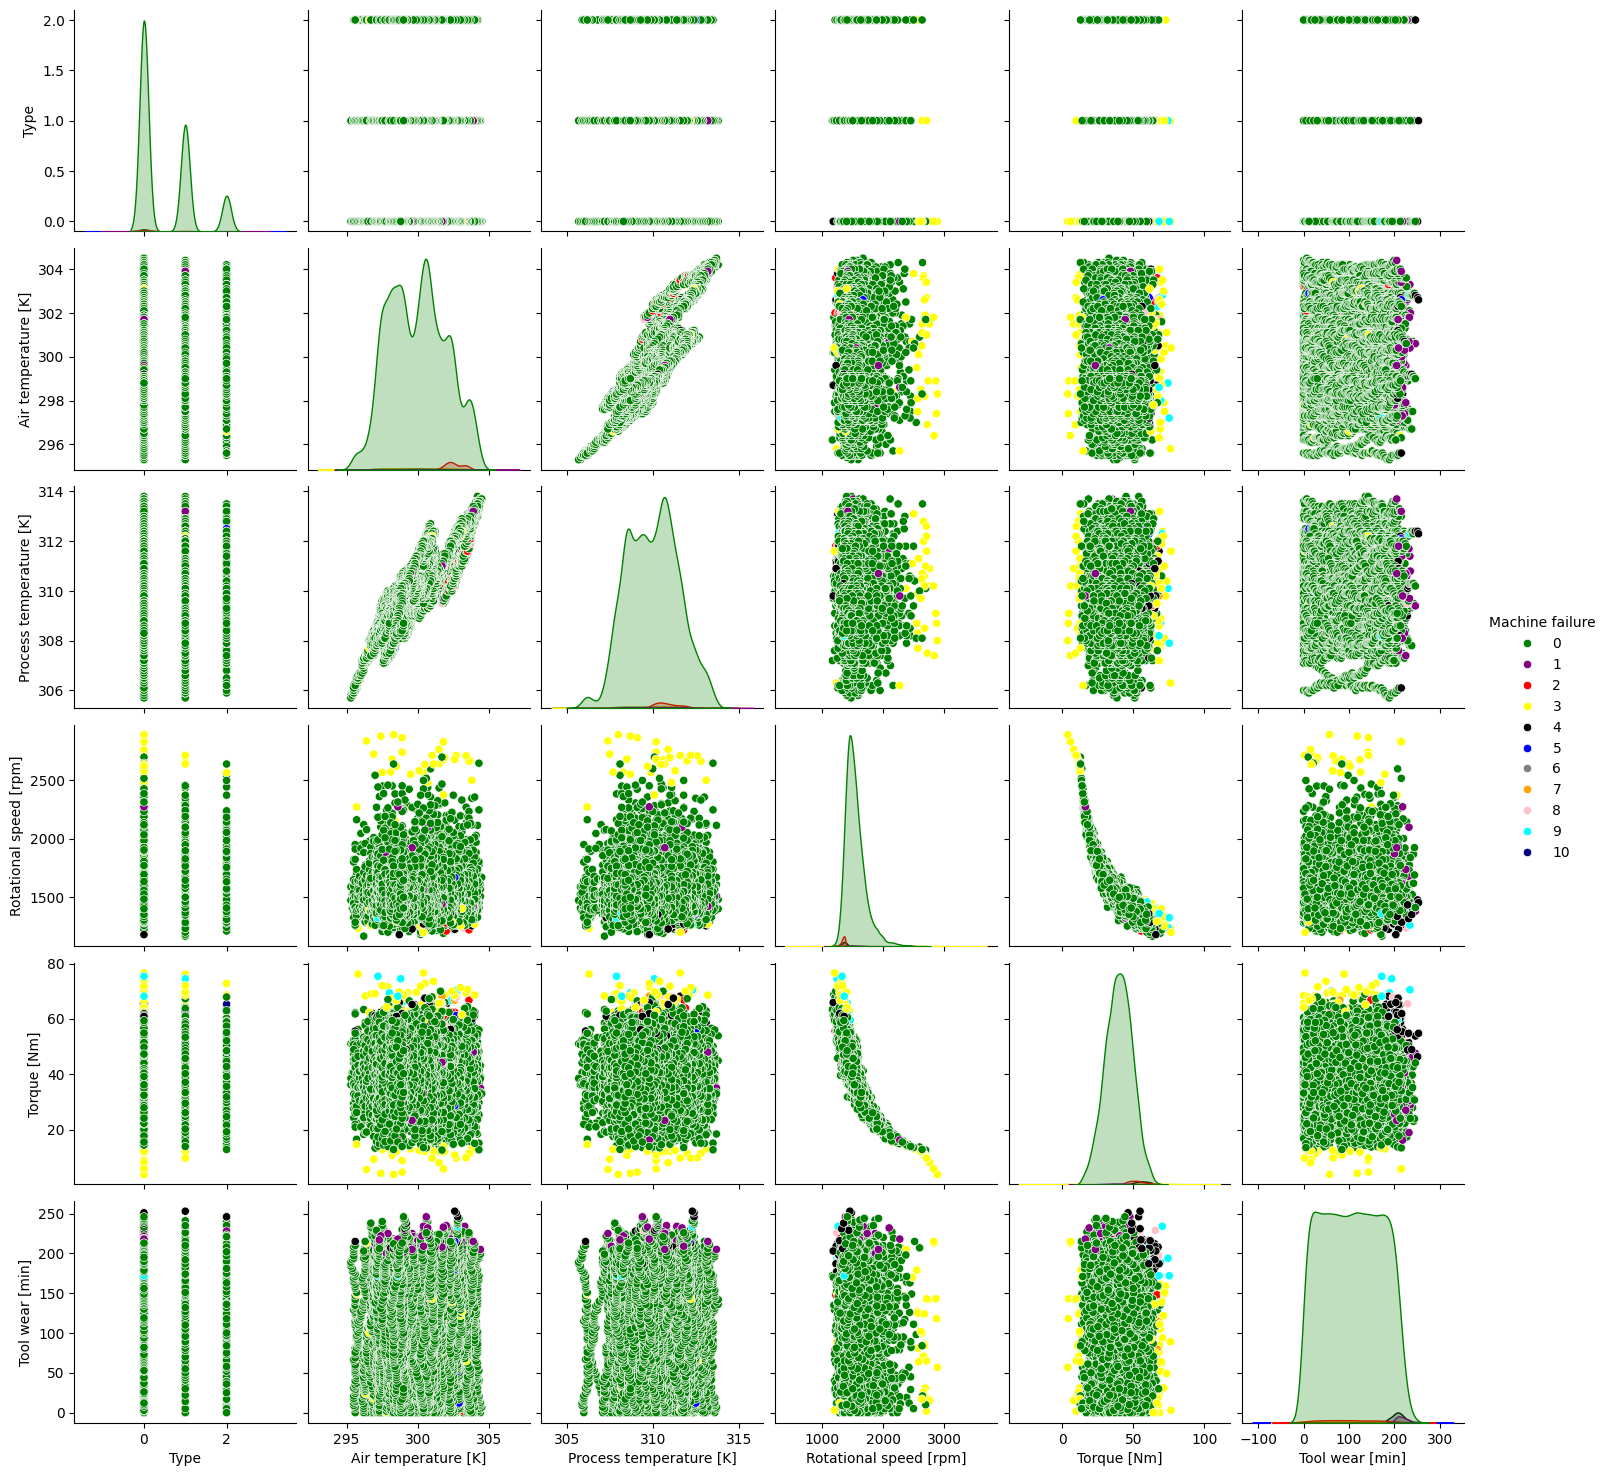

In [38]:

sns.pairplot(df, hue='Machine failure',palette=["green", "purple","red","yellow","black","blue","gray","orange","pink","cyan","navy"])

plt.show()

In [39]:
X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)

### Feature Importance and Selection

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [41]:
#import torch
#from torch import nn

#class EnhancedModel(nn.Module):
#    def __init__(self, input_size, output_size):
#        super(EnhancedModel, self).__init__()
#        self.network = nn.Sequential(
#            nn.Linear(input_size, 128),
#            nn.ReLU(),
#            nn.BatchNorm1d(128),
#            nn.Dropout(0.3),
#            nn.Linear(128, 64),
#            nn.ReLU(),
#            nn.BatchNorm1d(64),
#            nn.Dropout(0.3),
#            nn.Linear(64, output_size),
#            nn.Softmax(dim=1)
#        )
#
#    def forward(self, x):
#        return self.network(x)


### Introducing Noise

In [42]:
#X,Y=augmented_X,augmented_Y


In [43]:
#X=X.to_numpy()
#X=torch.from_numpy(X).type(torch.float)

#Y=torch.from_numpy(Y).type(torch.LongTensor)

### Neural Network

In [44]:
X_train.shape

torch.Size([8000, 6])

In [45]:
device ='cuda' if torch.cuda.is_available() else 'cpu'

In [117]:

class ErrorTypeModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            #nn.BatchNorm1d(10),
            #nn.Dropout(0.3),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            #nn.BatchNorm1d(10),
            #nn.Dropout(0.3),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self,x):
        return self.linear_stack(x)

model_0 = ErrorTypeModel(input_features=6,output_features=11,hidden_units=64)

model_0.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[ 0.3121,  0.3388, -0.0956,  0.3750, -0.0894,  0.0824],
                      [-0.1988,  0.2398,  0.3599, -0.2995,  0.3548,  0.0764],
                      [ 0.3016,  0.0553,  0.1969, -0.0576,  0.3147,  0.0603],
                      [-0.1906,  0.1041, -0.1881, -0.0479, -0.1658,  0.2708],
                      [-0.3223, -0.1882, -0.1153, -0.2455,  0.0385, -0.4032],
                      [ 0.3687, -0.3468,  0.3152,  0.0679, -0.1326,  0.2523],
                      [ 0.0636,  0.3298,  0.0446, -0.1288,  0.1097, -0.1107],
                      [ 0.1718,  0.3645,  0.2360, -0.1785,  0.2357,  0.0730],
                      [ 0.2073, -0.2488, -0.4041, -0.1577, -0.3131,  0.3350],
                      [ 0.1176,  0.1691,  0.1291, -0.0071,  0.3195, -0.2901],
                      [ 0.0257, -0.2786,  0.1259, -0.1406,  0.1251, -0.0851],
                      [ 0.3386, -0.2420, -0.2435, -0.2435,  0.3672,  0.1360],
                      [ 0

In [118]:


loss_fn=nn.CrossEntropyLoss()
optimizer =torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

In [119]:
#X_train,X_test,y_train,y_test = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)

In [120]:
model_0.eval()
with torch.inference_mode():
    y_logits= model_0(X_test)
y_logits[:5]

y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

y_pred[:5]

tensor([6, 6, 6, 9, 6])

In [121]:
import helper_functions as hf

acc= hf.accuracy_fn(y_true=y_test,y_pred=y_pred,)
acc

0.0

In [122]:
## TODO: Uncomment this to set the seed
torch.manual_seed(42)

# Setup epochs
epochs=2000

# Send data to the device
#X_train,X_test,Y_train,Y_test= X_train.to(device),X_test.to(device),Y_train.to(device),Y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass (logits output)
  y_logits = model_0(X_train)
  # Turn logits into prediction probabilities
  y_pred_probs = torch.softmax(y_logits,dim=1)

  # Turn prediction probabilities into prediction labels
  y_pred = torch.argmax(y_pred_probs,dim=1)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = hf.accuracy_fn(y_train,y_pred) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test)
    # Turn the test logits into prediction labels
    test_pred= (torch.softmax(test_logits,dim=1)).argmax(dim=1)

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc= hf.accuracy_fn(y_test,test_pred)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 33.00505 | Acc: 0.01% | Test Loss: 17.67291 | Test acc: 0.00%
Epoch: 100 | Loss: 0.28325 | Acc: 96.53% | Test Loss: 0.31561 | Test acc: 96.75%
Epoch: 200 | Loss: 0.16646 | Acc: 96.75% | Test Loss: 0.17937 | Test acc: 96.80%
Epoch: 300 | Loss: 0.12672 | Acc: 96.81% | Test Loss: 0.13580 | Test acc: 96.80%
Epoch: 400 | Loss: 0.12077 | Acc: 96.84% | Test Loss: 0.13188 | Test acc: 96.90%
Epoch: 500 | Loss: 0.11760 | Acc: 96.83% | Test Loss: 0.12943 | Test acc: 96.95%
Epoch: 600 | Loss: 0.11526 | Acc: 96.81% | Test Loss: 0.12748 | Test acc: 97.00%
Epoch: 700 | Loss: 0.11329 | Acc: 96.88% | Test Loss: 0.12570 | Test acc: 97.00%
Epoch: 800 | Loss: 0.11161 | Acc: 96.89% | Test Loss: 0.12392 | Test acc: 97.05%
Epoch: 900 | Loss: 0.11008 | Acc: 96.96% | Test Loss: 0.12222 | Test acc: 97.25%
Epoch: 1000 | Loss: 0.10865 | Acc: 96.99% | Test Loss: 0.12059 | Test acc: 97.30%
Epoch: 1100 | Loss: 0.10727 | Acc: 97.05% | Test Loss: 0.11894 | Test acc: 97.30%
Epoch: 1200 | Loss: 0.10595 

In [123]:
# Plot decision boundaries for training and test sets
#plt.subplot(1,2,1)
#plt.title("Train")
#hf.plot_decision_boundary(model_0, X_train,Y_train)
#plt.subplot(1,2,2)
#plt.title("Test")
#hf.plot_decision_boundary(model_0, X_test,Y_test)
X.shape

torch.Size([1, 6])

In [124]:
new_data_example=pd.DataFrame({
    'Type':[0],
    'Air Temperature [K]':[298.8],
    'Process temperature [K]':[308.9],
    'Rotational speed [rpm]':[1852],
    'Torque [Nm]':[25.0],
    "Tool wear [min]":[57]
})
X=new_data_example.to_numpy()
X=torch.from_numpy(X).type(torch.float)
y_logits = model_0(X)
# Turn logits into prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)

# Turn prediction probabilities into prediction labels
y_pred = int(torch.argmax(y_pred_probs,dim=1))


In [125]:
import pickle
with open('Predictive_maintainence_model.pkl', 'wb') as file:
    pickle.dump(ErrorTypeModel, file)